In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles



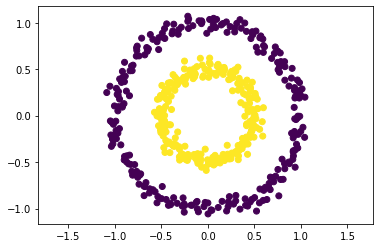

In [3]:
#Crear dataset



x,y = make_circles(n_samples=n, factor=0.5, noise=0.05)

y = y[:,np.newaxis]

plt.scatter(x[:,0], x[:,1],c=y, label=y)
plt.axis("equal")
plt.show()

In [13]:
print(type(x))
print(y)

<class 'numpy.ndarray'>
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 

In [4]:
#CLASE DE LA CAPA DE LA RED

class neural_layer:
	def __init__(self, n_conn, n_neur, act_f):
			self.b = np.random.rand(1, n_neur)     *2 - 1
			self.W = np.random.rand(n_conn, n_neur)*2 - 1
			self.act_f = act_f
            

In [9]:
#Iniciar la red neuronal

def create_nn(topology, act_f):

    nn = []
    for l, lateyer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
        
    return nn




In [6]:


def train(neural_net, X, Y, l2_cost, lr=0.05, train=True):

    out=[(None, X)]
    #propagación
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z,a))

    if train:

        #retropropagación
        deltas = []

        for l in reversed(range(0,len(neural_net))):

            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net) -1:
                #calcular delta última capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:    
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
                
            _W = neural_net[l].W

            #descenso del gradiente
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]


#train(neural_net, x, y, l2_cost, 0.5)
1

1

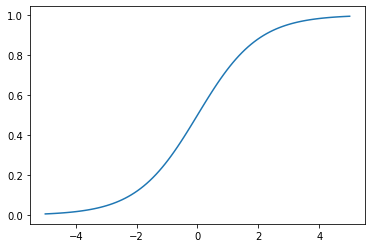

In [7]:
#FUNCIÓN DE ACTIVACIÓN

sigm = (lambda x: 1 / (1+np.e**(-x)),
        lambda x: x*(1-x))


_x = np.linspace (-5,5,100)
plt.plot(_x, sigm[0](_x))

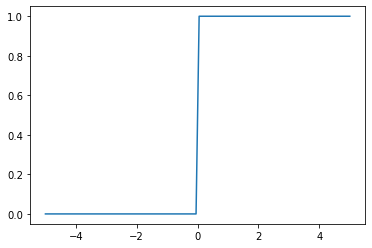

In [225]:
relu = (lambda x: np.maximum(0,x),
        lambda x: np.greater(x,0).astype(np.float32))

plt.plot(_x, relu[1](_x))

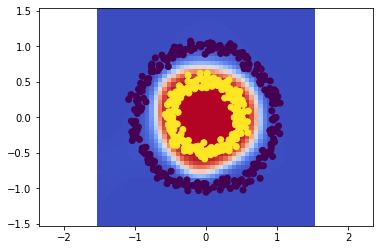

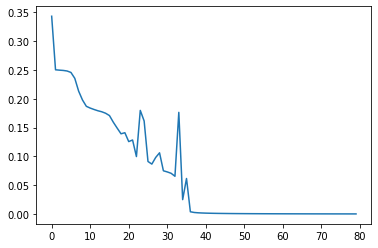

In [10]:
import time

from IPython.display import clear_output

topology = [p,4,8,1]

neural_n = create_nn (topology, sigm)

l2_cost = (lambda Yp,Yr: np.mean((Yp-Yr)**2),
            lambda Yp,Yr: (Yp-Yr))
            
loss = []

for i in range(2000):

    #entrenemos la red
    pY= train(neural_n,x,y,l2_cost,0.05)

    if i%25==0:
        loss.append(l2_cost[0](pY,y))

        res = 50

        _x0=np.linspace(-1.5,1.5,res)
        _x1=np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))

        for i0,x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1] = train(neural_n,np.array([[x0,x1]]),y,l2_cost, train=False)[0][0]
        
        plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")
        plt.axis("equal")

        plt.scatter(x[:,0], x[:,1],c=y, label=y)

        #plt.scatter(x[y[:,0] == 0,0],x[y[:,0] == 0,1], c="skyblue")
        #plt.scatter(x[y[:,0] == 1,0],x[y[:,0] == 1,1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)

